### Q1. What is the purpose of grid search cv in machine learning, and how does it work?

**Grid Search with Cross-Validation (GridSearchCV)** is a technique used in machine learning to systematically search for the best combination of hyperparameters for a given model. The primary purpose of GridSearchCV is to automate the process of hyperparameter tuning, helping you find the hyperparameter values that result in the best model performance on a validation dataset while avoiding manual trial-and-error.

Here's how GridSearchCV works:

#### Define Hyperparameter Grid:

First, you define a grid of hyperparameter values that you want to search over. These values represent different settings for hyperparameters that can significantly impact the model's performance. For example, in a support vector machine (SVM) model, you might want to search for the best combination of the kernel type (linear, polynomial, radial basis function, etc.) and the regularization parameter (C).

####  Cross-Validation:
GridSearchCV uses a cross-validation technique, typically k-fold cross-validation, to evaluate each combination of hyperparameters. In k-fold cross-validation, the dataset is divided into k subsets (or folds), and the model is trained and evaluated k times, with each fold serving as the validation set once and the remaining folds as the training set. This helps ensure robust performance evaluation.

####  Hyperparameter Combinations:
GridSearchCV exhaustively explores all possible combinations of hyperparameter values specified in the grid. For each combination, it trains the model on the training portion of the data and evaluates its performance on the validation portion.

#### Performance Metric:
You also specify a performance metric (e.g., accuracy, F1-score, or mean squared error) that GridSearchCV uses to assess the model's performance during cross-validation. The goal is to find the hyperparameters that optimize this metric.

#### Selecting the Best Model:
After evaluating all combinations, GridSearchCV selects the combination of hyperparameters that results in the best performance according to the specified metric.

#### Final Model Training:
With the best hyperparameters identified, GridSearchCV retrains the model using these optimal hyperparameters on the entire training dataset. This produces the final model that you can use for making predictions on new, unseen data.

GridSearchCV is a powerful tool for hyperparameter tuning because it systematically explores the hyperparameter space, ensuring that you find the best hyperparameters for your model while avoiding overfitting to the validation set. However, it can be computationally expensive, especially when the hyperparameter space is large or when the dataset is substantial. In such cases, alternatives like RandomizedSearchCV, which randomly samples from the hyperparameter space, can be used to reduce computational costs while still searching for good hyperparameters.

In [1]:
"""
Logistic Regression with GridSearchCV
- Dataset: Synthetic binary classification
- Objective: Find best hyperparameters and evaluate model
"""
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

X,y = make_classification(n_samples=1000,n_features=10,n_redundant=5,n_informative=5,n_classes=2,random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

from sklearn.model_selection import GridSearchCV
from warnings import filterwarnings
filterwarnings("ignore")

parameters = {'penalty': ('l1', 'l2', 'elasticnet'),'C':[1,10,20,30]}

classifier = LogisticRegression()

clf = GridSearchCV(classifier,param_grid=parameters,cv=5)

clf.fit(X_train,y_train)

print(clf.best_params_)
print(clf.best_score_)

classifier=LogisticRegression(C=1,penalty='l2')
classifier.fit(X_train,y_train)
y_pred= classifier.predict(X_test)
print("--------------------------------")
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


{'C': 1, 'penalty': 'l2'}
0.8087500000000001
--------------------------------
0.79
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        91
           1       0.86      0.73      0.79       109

    accuracy                           0.79       200
   macro avg       0.79      0.80      0.79       200
weighted avg       0.80      0.79      0.79       200



### Q2. Describe the difference between grid search cv and randomize search cv, and when might you choose one over the other?

#### Grid Search CV

It tries every possible combination of the hyperparameters you give.

You define a grid (like C = [1, 10, 100] and penalty = ['l1', 'l2']), and it checks all combinations (e.g., 6 total if 3×2).

Good when the search space is small and you want to be very thorough.

Bad when there are too many combinations — it becomes very slow and computationally expensive.

#### Randomized Search CV

It randomly samples combinations of hyperparameters from the space you define.

You also set how many combinations you want it to try (e.g., 10 or 50).

Good when the search space is large and you want to find a good enough solution faster.

Bad because it might miss the absolute best combination, but often it’s close enough.

#### When to choose which?
Use Grid Search when you can afford time for a full search; use Randomized Search when you need faster results over a big parameter space.



### Q3. What is data leakage, and why is it a problem in machine learning? Provide an example.

Data leakage, also known as information leakage or data snooping, is a critical issue in machine learning. It occurs when information from outside the training dataset is improperly used to create or evaluate a machine learning model. Data leakage can lead to artificially high model performance during training and validation but result in poor generalization to new, unseen data. It is a problem because it can mislead model development and undermine the model's ability to make accurate predictions on real-world data.

Here's an example to illustrate data leakage:

Example: Predicting Loan Default

Suppose you are building a machine learning model to predict whether an individual will default on a loan based on their credit history. You have a dataset with features such as credit score, income, employment status, and previous loan history, as well as the target variable indicating whether the individual defaulted on their loan (1 for default, 0 for non-default).

#### Data Leakage Scenario:

You notice that the dataset includes a feature called "Months Since Last Default," which indicates how many months have passed since the individual's last loan default (if any).

You decide to use this feature in your model because you believe it could be a strong predictor of loan default.
Problem: In this scenario, using the "Months Since Last Default" feature introduces data leakage. Here's why:

During model development, the feature "Months Since Last Default" may contain information about loan defaults that occurred after the loan approval decision. For example, if someone defaulted on a loan after 12 months, the feature value for that individual would be 12. However, at the time of making a loan approval decision, this information would not have been available.
By using this feature, your model effectively "looks into the future" to make predictions. It learns to use information that would not be available at the time when the model is deployed for making loan approval decisions.

#### Consequences:
The model may appear to perform exceptionally well during training and cross-validation because it has access to information that it shouldn't.   

When you deploy the model to make real loan approval decisions, it is likely to perform poorly because it cannot access future information. It may make inaccurate predictions, leading to increased financial risks for the lender.

To prevent data leakage in this scenario, you should carefully review your features to ensure they do not contain information that would not be available at the time when predictions are made. In the case of "Months Since Last Default," you should exclude this feature from your model and use only information that would be known at the time of making loan approval decisions, such as credit score, income, and employment status. This ensures that your model is built on relevant and valid information and avoids the problem of data leakage.

### Q4. How can you prevent data leakage when building a machine learning model?

#### 1.Split your data first   
Always split into training and test sets first.   
Do any preprocessing (scaling, encoding, etc.) only on the training data — then apply the same transformation to the test data. 
1.Wrong: Scale the whole dataset, then split.    
2.Correct: Split first, then fit scaler on training, transform training + test separately.    
  
#### 2.Use Pipelines    
Build pipelines (sklearn.pipeline) to chain preprocessing and modeling together.   
This way, cross-validation and grid search apply preprocessing properly without leaking test info.    

#### 3.Be careful with feature engineering   
Only create features based on training data.     
Don’t create features that "peek" into the future (especially in time-series data).    
**Example:**   
Predicting if a customer will churn — you shouldn’t include features like "next month’s bill"!   

#### 4.Use proper Cross-Validation   
Use cross-validation correctly (especially stratified if classes are imbalanced).     
Make sure validation folds don't leak information from the training folds.    

#### 5. Understand the data deeply  
Sometimes leakage is sneaky (e.g., an ID column might hint at the label).   
Think carefully about where each feature comes from — was it available at prediction time?   
 
###### Conclusion:

Always split early, preprocess carefully, use pipelines, watch your features, and validate properly.



### Q5. What is a confusion matrix, and what does it tell you about the performance of a classification model?

A confusion matrix is a performance evaluation tool in machine learning, representing the accuracy of a classification model. It displays the number of true positives, true negatives, false positives, and false negatives. This matrix aids in analyzing model performance, identifying mis-classifications, and improving predictive accuracy.

A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the total number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

For a binary classification problem, we would have a 2 x 2 matrix, as shown below, with 4 values:

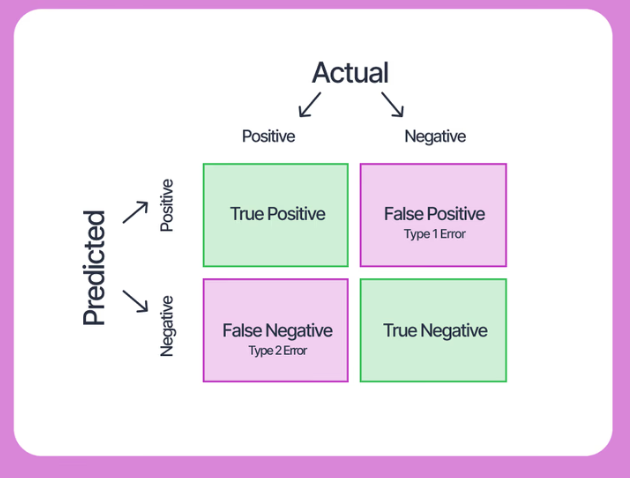


The target variable has two values: Positive or Negative

The columns represent the actual values of the target variable

The rows represent the predicted values of the target variable

###### Important Terms in a Confusion Matrix

**True Positives (TP):** The number of instances correctly predicted as the positive class (e.g., correctly identified as "Yes" or "Class 1" if it's a binary classification problem).

**True Negatives (TN):** The number of instances correctly predicted as the negative class (e.g., correctly identified as "No" or "Class 0" if it's a binary classification problem).

**False Positives (FP):** The number of instances incorrectly predicted as the positive class when they actually belong to the negative class (also known as Type I error or false alarms).

**False Negatives (FN):** The number of instances incorrectly predicted as the negative class when they actually belong to the positive class (also known as Type II error or misses).

With the help of Confusion Matrix we can calculate the following metrics:

##### Accuracy:

It measures the overall correctness of predictions and is calculated as
(TP+TN)/(TP+TN+FP+FN).
However, accuracy may not be suitable for imbalanced datasets.

##### Precision (Positive Predictive Value):

It measures the accuracy of positive predictions and is calculated as
TP/(TP+FP).
It answers the question: "Of all the instances predicted as positive, how many were correctly classified?"

##### Recall (Sensitivity, True Positive Rate):

It measures the model's ability to identify all relevant instances of the positive class and is calculated as
TP/(TP+FN).
It answers the question: "Of all the actual positive instances, how many did the model correctly classify?"

##### Specificity (True Negative Rate):

It measures the model's ability to identify all relevant instances of the negative class and is calculated as
TN/(TN+FP).
It answers the question: "Of all the actual negative instances, how many did the model correctly classify?"

##### F1-Score:

The F1-score is the harmonic mean of precision and recall and provides a balance between these two metrics. It is calculated as
2(Precision*Recall) / (Precision+Recall).

##### Receiver Operating Characteristic (ROC) Curve and Area Under the ROC Curve (AUC-ROC):

These metrics evaluate a model's performance across various classification thresholds and are especially useful when you need to balance precision and recall. The ROC curve shows the trade-off between true positive rate and false positive rate, while AUC-ROC summarizes this trade-off into a single value.

### Q6. Explain the difference between precision and recall in the context of a confusion matrix.

Precision and recall are two important performance metrics used to evaluate the quality of a classification model, particularly in the context of a confusion matrix. They provide insights into the model's ability to make accurate positive predictions and to capture all relevant positive instances, respectively. Here's an explanation of the difference between precision and recall:

#### Precision (Positive Predictive Value):

Definition: Precision measures the accuracy of positive predictions made by the model. It quantifies the proportion of instances predicted as positive that are actually true positives. Precision is calculated as TP/(TP+FP)

Interpretation: Precision answers the question: "Of all the instances that the model predicted as positive, how many were correctly classified?" It focuses on the correctness of positive predictions and is particularly relevant when the cost of false positives is high. A high precision indicates that the model is cautious about making positive predictions and tends to be accurate when it does make them.

#### Recall (Sensitivity, True Positive Rate):

Definition: Recall measures the model's ability to identify all relevant positive instances from the total number of actual positive instances. It quantifies the proportion of true positives that were correctly classified by the model. Recall is calculated as TP/(TP+FN)

#### Interpretation: 
Recall answers the question: "Of all the actual positive instances, how many did the model correctly classify?" It focuses on the model's ability to capture all positive cases and is particularly relevant when it's crucial not to miss any positive instances. A high recall indicates that the model is sensitive to identifying positive cases, even if it means it may produce more false positives in the process.

#### In summary:

Precision tells you how accurate your positive predictions are. It is concerned with minimizing false positives, which is beneficial when false positives are costly or undesirable.

Recall tells you how effectively your model captures all positive instances. It is concerned with minimizing false negatives, which is crucial when missing positive cases can have significant consequences.

### Q7. How can you interpret a confusion matrix to determine which types of errors your model is making?

Interpreting a confusion matrix is crucial for understanding the types of errors your classification model is making. A confusion matrix provides a breakdown of the model's predictions, categorizing them into four key components: True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN). By analyzing these components, you can gain valuable insights into your model's performance and the types of errors it is committing. Here's how you can interpret a confusion matrix to determine the types of errors your model is making:

#### True Positives (TP):

Definition: TP represents instances that the model correctly predicted as positive. These are cases where the model accurately identified the positive class.
Interpretation: TP indicates the number of successful positive predictions made by the model. It represents instances where the model correctly recognized the presence of the target condition or class.

#### True Negatives (TN):

Definition: TN represents instances that the model correctly predicted as negative. These are cases where the model accurately identified the absence of the positive class.
Interpretation: TN indicates the number of successful negative predictions made by the model. It represents instances where the model correctly recognized the absence of the target condition or class.

#### False Positives (FP):

Definition: FP represents instances that the model incorrectly predicted as positive when they were actually negative. These are instances where the model made a false alarm or Type I error.
Interpretation: FP indicates the number of instances where the model wrongly classified something as positive when it was not. It represents situations where the model has a tendency to overpredict the positive class.

#### False Negatives (FN):

Definition: FN represents instances that the model incorrectly predicted as negative when they were actually positive. These are instances where the model missed the positive class or made a Type II error.
Interpretation: FN indicates the number of instances where the model failed to classify something as positive when it was. It represents situations where the model has a tendency to underpredict the positive class.
By examining the values in each quadrant of the confusion matrix, you can assess your model's strengths and weaknesses.

#### High TP and TN:
A model with a high number of TP and TN indicates strong predictive accuracy and is effective at both recognizing positive cases and correctly identifying negative cases.

#### High FP: 
A model with a high number of FP suggests that it tends to make false positive errors, indicating a propensity to overpredict the positive class. This may be useful in situations where being cautious and flagging potential positives is more critical than avoiding false alarms.

#### High FN: 
A model with a high number of FN suggests that it tends to miss positive cases, indicating a propensity to underpredict the positive class. This may be problematic in scenarios where missing positive instances has significant consequences.

Understanding the types of errors your model is making can guide further model improvements, threshold adjustments, or changes to your classification strategy. Additionally, it can help you calculate various performance metrics, such as accuracy, precision, recall, F1-score, and specificity, to gain a more quantitative assessment of your model's performance and the trade-offs between different types of errors.

### Q8. What are some common metrics that can be derived from a confusion matrix, and how are they calculated?

With the help of Confusion Matrix we can calculate the following metrics:

#### Accuracy:

It measures the overall correctness of predictions and is calculated as
**(TP+TN)/(TP+TN+FP+FN).**
However, accuracy may not be suitable for imbalanced datasets.
#### Precision (Positive Predictive Value):

It measures the accuracy of positive predictions and is calculated as
**TP/(TP+FP).**
It answers the question: "Of all the instances predicted as positive, how many were correctly classified?"

#### Recall (Sensitivity, True Positive Rate):

It measures the model's ability to identify all relevant instances of the positive class and is calculated as
**TP/(TP+FN).**
It answers the question: "Of all the actual positive instances, how many did the model correctly classify?"

#### Specificity (True Negative Rate):

It measures the model's ability to identify all relevant instances of the negative class and is calculated as
**TN/(TN+FP).**
It answers the question: "Of all the actual negative instances, how many did the model correctly classify?"

#### F1-Score:

The F1-score is the harmonic mean of precision and recall and provides a balance between these two metrics. It is calculated as
**2(Precision*Recall) / (Precision+Recall).**

#### Receiver Operating Characteristic (ROC) Curve and Area Under the ROC Curve (AUC-ROC):

These metrics evaluate a model's performance across various classification thresholds and are especially useful when you need to balance precision and recall. The ROC curve shows the trade-off between true positive rate and false positive rate, while **AUC-ROC summarizes this trade-off into a single value.**

### Q9. What is the relationship between the accuracy of a model and the values in its confusion matrix?

The accuracy of a model is closely related to the values in its confusion matrix, as the confusion matrix provides a detailed breakdown of the model's predictions, including true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). These values are used to calculate accuracy and other performance metrics.

#### Accuracy:

Accuracy is a metric that measures the overall correctness of a classification model's predictions.
It is calculated as (TP+TN)/(TP+TN+FP+FN) , which is the ratio of correct predictions (TP and TN) to the total number of instances.

####  Relationship:

Accuracy depends on the sum of TP and TN in the confusion matrix because these are the correct predictions. Therefore, the more TP and TN a model has, the higher its accuracy.
Conversely, accuracy is negatively affected by the sum of FP and FN because these are the incorrect predictions. As FP and FN increase, accuracy decreases.

Accuracy provides an overall measure of a model's performance by considering both correct and incorrect predictions. It is directly related to the values in the confusion matrix, with TP and TN contributing positively to accuracy and FP and FN contributing negatively. While accuracy is a useful metric, it may not provide a complete picture of model performance, especially in situations with class imbalance, where other metrics like precision, recall, and F1-score may offer a more informative assessment of the model's effectiveness.

### Q10. How can you use a confusion matrix to identify potential biases or limitations in your machine learning model?

A confusion matrix can be a valuable tool for identifying potential biases or limitations in your machine learning model, particularly when you are dealing with classification tasks. Here's how you can use a confusion matrix to detect such biases or limitations:  

#### Class Imbalance:

**Issue:** Class imbalance occurs when one class significantly outnumbers the other in the dataset. This can lead to a model that is biased towards the majority class and may perform poorly on the minority class.   
**Detection:** Look at the distribution of values in the confusion matrix. If one class has a disproportionately higher number of true positives (TP) or true negatives (TN) compared to the other, it may indicate class imbalance.   

#### Bias Towards Negative or Positive Predictions:
  
**Issue:** A model may have a bias towards predicting one class more frequently than the other, leading to an imbalance in false positives (FP) or false negatives (FN).   
**Detection:** Compare the number of FP and FN for each class in the confusion matrix. If one class has a substantially higher number of FP or FN, it may indicate a bias towards that class in predictions.

#### Threshold Sensitivity:

**Issue:** The model's predictions may be sensitive to the classification threshold used to convert predicted probabilities into class labels. A lower threshold may result in more positive predictions, while a higher threshold may lead to more negative predictions.    
**Detection:** Experiment with different classification thresholds and observe changes in FP and FN rates. A significant shift in predictions with threshold changes can highlight sensitivity issues.  

#### Misclassification Patterns:

**Issue:** Examining specific patterns of misclassification in the confusion matrix can reveal insights into where the model struggles. For example, if the model consistently misclassifies certain subgroups within a class, it may indicate bias or limitations.   
**Detection:** Analyze FN and FP patterns in the confusion matrix, paying attention to which features or characteristics are associated with misclassified instances.   

#### Performance Disparities:

**Issue:** Different classes within your target variable may exhibit varying degrees of model performance. One class may have a high precision, while another has a high recall or vice versa.   
**Detection:** Calculate class-specific metrics (precision, recall, F1-score) for each class based on the confusion matrix. Identify classes with significantly different performance characteristics.   

#### External Factors:  

**Issue:** External factors, such as data collection bias, may introduce bias or limitations into the model. For example, if your training data is collected in a biased manner, the model may inherit those biases.    
**Detection:** Examine the sources of your training data and assess whether they may introduce inherent biases. Conduct a bias audit to identify potential sources of bias in data collection.   


Using a confusion matrix in conjunction with other metrics like precision, recall, F1-score, and ROC curves can help you uncover potential biases or limitations in your machine learning model. Once identified, you can take corrective measures, such as collecting more balanced data, adjusting classification thresholds, or addressing data collection biases, to mitigate these issues and improve the model's fairness and performance.